<h1><center>PREDICTING CUSTOMER CHURN WITH ARTIFICIAL NEURAL NETWORKS</center></h1>

## Dataset Information
In tech businesses, there are times when a customer in on boarded and then later discard the service or cancel a subscription, this phenomenon is customer churn. The data contains behavior customers in service offering to predict their churn

In [8]:
# Load libraries
import pandas as pd
import keras
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold


In [9]:
# loading the dataset
customer_churn = pd.read_csv("Churn.csv")

## About the Model
An input layer taking the length of the data as shape = 6575,  was used with 64 and 32 hidden layers activation functions of Rectified Linear Units (ReLU), while "Sigmoid" was used as the output layer function since we are predicting the likelihood of Churn which is binary. 

Furthermore, in compiling the model; Stochastic Gradient Descent (sgd) was used as the optimizer and Binary cross entropy was employed for the loss function.

In [10]:
# Prepareing the data for the model
X = pd.get_dummies(customer_churn.drop(['Churn', 'Customer ID'], axis=1))

y = customer_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Gettting the split for the training and testing data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=.2)

X_train = X_train_full.sample(frac=0.7, random_state=0)
X_valid = X_train_full.drop(X_train.index)

y_train = y_train_full.sample(frac=0.7, random_state=0)
y_valid = y_train_full.drop(y_train.index)

X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)
X_valid = X_valid.astype(np.int32)



In [11]:
# Shape of the training data
X_train.shape
len(X_train.columns)

6575

In [13]:
#Building the model
model = keras.Sequential([
    keras.layers.Input(shape=(6575,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', 
optimizer='sgd', metrics='accuracy')

In [14]:
# Fitting the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200, verbose=0)

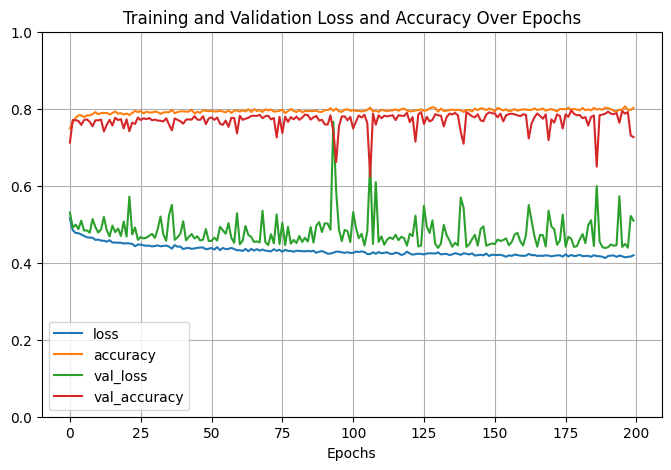

In [15]:
# Visualizing the model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.title('Training and Validation Loss and Accuracy Over Epochs')
plt.show()


training_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [16]:
# Evaluate the model on the test data using `evaluate`
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

45/45 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7495
Test Loss: 0.4776
Test Accuracy: 0.75


## Evaluation of Model with Testing Data
The testing set produced a Accuracy of 75% and loss of 0.47 which is significantly good and shows that the model is optimal. The optimality of the model is also evident in how the loss, validation loss and Accuracy with the validation accuracy are close together in the plot below